In [19]:
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words= stopwords.words("english")
from sklearn.model_selection import train_test_split
import re
import nltk
import pandas as pd
import numpy as np
import pickle

In [20]:
data = pd.read_csv(r"C:\Users\user\PYTHON NOTEBOOKS\Fake News Classifier\fake news\train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
data["title"][982],data["label"][901]

('Fired TV Reporter: I’ve Received Thousands of ’Sexual and Violent’ Threats',
 1)

In [22]:
data["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [23]:
data.shape

(20800, 5)

In [24]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [25]:
data = data.dropna()

In [26]:
data.shape

(18285, 5)

In [27]:
X = data.drop("label", axis = 1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [28]:
y = data["label"]

In [29]:
X.isna().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [30]:
y.isna().sum()

0

In [31]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [32]:
X.shape, y.shape

((18285, 4), (18285,))

In [33]:
X.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


### Due to dropping of NaN values, the index values are not in order. Hence we reset the index

In [34]:
X.reset_index(inplace = True)
X.head(10)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [35]:
print(X["title"][7], y[7])
print(X["title"][101], y[101])
print(X["title"][98], y[98])
print(X["title"][2956], y[2956])

A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times 0
Clinton Campaign Chair Had Dinner With Top DOJ Official One Day After Hillary’s Benghazi Hearing 0
Teacher Suspended for Allowing Students to Hit Trump Pinata for Cinco de Mayo 0
Oscar Nominations 2017: 14 for ‘La La Land,’ and 6 for Black Actors - The New York Times 0


In [36]:
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [37]:
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-z-A-Z]', ' ', X["title"][i])
    review = review.lower()
    review = review.split()
    review = [stem.stem(word) for word in review if not word in stop_words]
    
    review = ' '.join(review)
    corpus.append(review)

In [38]:
corpus[:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

# Using TFIDF Vectorizer:

In [40]:
tfidf = TfidfVectorizer(max_features= 5000, ngram_range= (1,3)) 
# n_gram range shows we take combinations of 1, 2 & 3 words
# max_features shows we are taking top 5000 most frequent words
X = tfidf.fit_transform(corpus).toarray()

In [43]:
tfidf.get_feature_names()[100:125]

['al',
 'al aqsa',
 'al gore',
 'al nusra',
 'al qaeda',
 'alabama',
 'alarm',
 'album',
 'alcohol',
 'aleppo',
 'aleppo new',
 'aleppo new york',
 'alert',
 'alex',
 'alex jone',
 'ali',
 'alien',
 'alien muslim',
 'aliv',
 'all',
 'all tim',
 'allah',
 'allahu',
 'allahu akbar',
 'alleg']

In [44]:
X.shape # 5000 because of max_features

(18285, 5000)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
X_train.shape, y_train.shape

((14628, 5000), (14628,))

In [47]:
X_test.shape, y_test.shape

((3657, 5000), (3657,))

# Using Naive Bayes:

In [29]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [30]:
from sklearn import metrics
pred = NB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [31]:
print(score)

0.9012852064533771


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

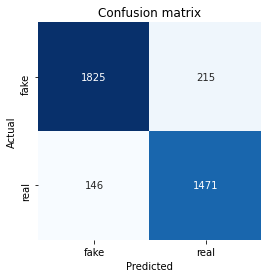

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
classnames = ['fake', 'real']

plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar = False, xticklabels = classnames, yticklabels = classnames, fmt = 'd', annot = True, cmap = plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
index = 12

sample = [data["title"][index]]
label = data["label"][index]
print("Message: ", sample)
print("Label: ",label)

corpus=[]
for i in range (0, len(sample)):
    review= re.sub('[^a-zA-Z]', ' ', sample[i]) # ^ means not/except
    review= review.lower()
    review= review.split()
    
    review= [stem.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)
    
sample = cv.transform(sample).toarray()
print(sample)

print(len(sample[0]))

print("Prediction: ", NB.predict(sample))

Message:  ['Russian Researchers Discover Secret Nazi Military Base ‘Treasure Hunter’ in the Arctic [Photos]']
Label:  1
[[0 0 0 ... 0 0 0]]
5000
Prediction:  [1]


# Using Logistic Regression:

In [355]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print(score)

0.9373803664205633


In [356]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

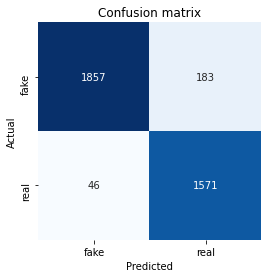

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
classnames = ['fake', 'real']

plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar = False, xticklabels = classnames, yticklabels = classnames, fmt = 'd', annot = True, cmap = plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [360]:
index = 91

sample = [data["title"][index]]
label = data["label"][index]
print("Message: ", sample)
print("Label: ",label)

corpus=[]
for i in range (0, len(sample)):
    review= re.sub('[^a-zA-Z]', ' ', sample[i]) # ^ means not/except
    review= review.lower()
    review= review.split()
    
    review= [stem.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)

sample = cv.transform(sample).toarray()
print(sample)

print(len(sample[0]))

print("Prediction:", logreg.predict(sample))

Message:  ['Investment Strategist Forecasts Collapse Timeline: ‘The Last Gasp Of This Economic Cycle Will Come In 2018’']
Label:  1
['invest strategist forecast collaps timelin last gasp econom cycl come']
[[0 0 0 ... 0 0 0]]
5000
Prediction: [1]


# Saving the model and the Count Vectorizer

In [67]:
pickle.dump(tfidf, open('FakeNewsClassifier_TFIDF.pkl', 'wb'))

In [363]:
pickle.dump(logreg, open('FakeNewsClassifier_Logreg.pkl', 'wb'))
pickle.dump(cv, open('FakeNewsClassifier_CV.pkl', 'wb'))

# Loading the model and the Count Vectorizer to make predictions

In [48]:
joblib_model = pickle.load(open('FakeNewsClassifier_Logreg.pkl', 'rb'))
joblib_cv = pickle.load(open('FakeNewsClassifier_CV.pkl', 'rb'))

In [66]:
index = 167

sample = [data["title"][index]]
label = data["label"][index]
print("Message: ", sample)
print("Label: ",label)

corpus=[]
for i in range (0, len(sample)):
    review= re.sub('[^a-zA-Z]', ' ', sample[i]) # ^ means not/except
    review= review.lower()
    review= review.split()
    
    review= [stem.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)
    
val_pkl = tfidf.transform([review]).toarray()
print("Prediction: ", joblib_model.predict(val_pkl))

Message:  ['Goodbye, for Good, to Black Sabbath - The New York Times']
Label:  0
Prediction:  [1]
